In [2]:
import http.client
import json
import datetime
import pandas as pd
from statistics import mean
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from sklearn import linear_model

In [3]:
font1 = {'color':'black','size':20}

# Gathering data and indexing

In [4]:
def getMonday(dateNow):
    today = dateNow
    today = today + datetime.timedelta(days=-today.weekday(), weeks=-1)
    return today.strftime("%d-%m-%Y")

In [55]:
def getOpenCovidPeruData(date):
    mondayDate = getMonday(date)
    conn = http.client.HTTPSConnection("open-covid-api-vwgk4ckqbq-uk.a.run.app")
    payload = ''
    headers = {}
    conn.request("GET", f"/api/semaforo?fecha={mondayDate}", payload, headers)
    res = conn.getresponse()
    data = res.read()
    jsonData = json.loads(data.decode('utf-8'))
    filteredData =  list(map((lambda value: {'region':value['region'],'appliedTests':value['avgTest'],'testPositivityPercentage':value['positividad'],'population':value['poblacion'],'bedsOccupiedPercentage':value['camasCovid'],'bedsUCIOccupiedPercentage':value['uci'],'confirmedCasesWeekly':round((value['poblacion']*value['incid_100'])/100000,2),'deathsCasesWeekly':round((value['poblacion']*value['fall_100'])/100000,2)}), jsonData[0]['regions']))
    df = pd.DataFrame(filteredData)
    return df

dfOpenCovidTest = getOpenCovidPeruData(datetime.date.today()-datetime.timedelta(days=8))

In [54]:
regions = dfOpenCovidTest['region']

In [27]:
confirmedDeaths100k = (dfOpenCovidTest['deathsCasesWeekly'] / dfOpenCovidTest['population']) * 10**6
confirmedDeathsProcessed = pd.concat({'region':regions,'confirmedDeathsProcessed':confirmedDeaths100k},axis=1)
confirmedDeathsProcessed

,region,confirmedDeaths100k
0,AMAZONAS,14.799373
1,ANCASH,11.201614
2,APURIMAC,15.206945
3,AREQUIPA,6.400016
4,AYACUCHO,14.506132
5,CAJAMARCA,4.402811
6,CALLAO,13.101605
7,CUSCO,9.603255
8,HUANCAVELICA,16.109314
9,HUANUCO,15.003118


In [40]:
confirmedCases100k = (dfOpenCovidTest['confirmedCasesWeekly'] / dfOpenCovidTest['population']) * 10**6
confirmedCasesProcessed = pd.concat({'region': regions, 'confirmedCases100k':confirmedCases100k},axis=1)
confirmedCasesProcessed

,region,confirmedCases100k
0,AMAZONAS,135.308556
1,ANCASH,202.198758
2,APURIMAC,143.401489
3,AREQUIPA,187.001284
4,AYACUCHO,212.998132
5,CAJAMARCA,84.202203
6,CALLAO,205.601110
7,CUSCO,173.898997
8,HUANCAVELICA,101.091113
9,HUANUCO,67.000069


In [42]:
appliedTests100k = (dfOpenCovidTest['appliedTests'] / dfOpenCovidTest['population']) * 10**6
appliedTestsProcessed = pd.concat({'region': regions,'appliedTests100k': appliedTests100k},axis=1)
appliedTestsProcessed

,region,appliedTests100k
0,AMAZONAS,751.385327
1,ANCASH,522.881061
2,APURIMAC,813.158787
3,AREQUIPA,1069.740902
4,AYACUCHO,504.019256
5,CAJAMARCA,424.534509
6,CALLAO,582.106728
7,CUSCO,595.949384
8,HUANCAVELICA,762.584109
9,HUANUCO,367.374281


In [45]:
positivityRate = (dfOpenCovidTest['testPositivityPercentage'])
positivityRateProcessed = pd.concat({'region':regions,'positivityRate':positivityRate},axis=1)
positivityRateProcessed

,region,positivityRate
0,AMAZONAS,3.26
1,ANCASH,3.11
2,APURIMAC,4.22
3,AREQUIPA,1.12
4,AYACUCHO,6.32
5,CAJAMARCA,1.33
6,CALLAO,3.04
7,CUSCO,2.14
8,HUANCAVELICA,3.24
9,HUANUCO,2.24


In [49]:
bedsOccupiedPercentage = (dfOpenCovidTest['bedsOccupiedPercentage'])
bedsOccupiedPercentageProcessed = pd.concat({'region':regions,'bedsOccupiedPercentage':bedsOccupiedPercentage},axis=1)
bedsOccupiedPercentageProcessed

,region,bedsOccupiedPercentage
0,AMAZONAS,7.41
1,ANCASH,17.68
2,APURIMAC,8.70
3,AREQUIPA,40.03
4,AYACUCHO,10.92
5,CAJAMARCA,3.75
6,CALLAO,63.14
7,CUSCO,19.09
8,HUANCAVELICA,6.34
9,HUANUCO,22.34


In [57]:
bedsUCIOccupiedPercentage=dfOpenCovidTest['bedsUCIOccupiedPercentage']
bedsUCIOccupiedPercentageProcessed = pd.concat({'region': regions, 'bedsUCIOccupiedPercentage' : bedsUCIOccupiedPercentage}, axis=1)
bedsUCIOccupiedPercentageProcessed

,region,bedsUCIOccupiedPercentage
0,AMAZONAS,21.05
1,ANCASH,62.30
2,APURIMAC,20.00
3,AREQUIPA,91.11
4,AYACUCHO,50.00
5,CAJAMARCA,19.05
6,CALLAO,72.95
7,CUSCO,80.39
8,HUANCAVELICA,9.52
9,HUANUCO,43.48


In [7]:
def getWaqiData():
    humidityTotal = []
    pressureTotal = []
    pm10Total = []
    pm25Total = []
    temperatureTotal = []
    for department in ['@7580','@7577','@7578','@8780','@379']:
        conn = http.client.HTTPSConnection("api.waqi.info")
        payload = ''
        headers = {}
        conn.request("GET", f"/feed/{department}/?token=d91a4fcc7a848a548eaaeba48ae3a30f08e5d402", payload, headers)
        res = conn.getresponse()
        data = res.read()
        jsonData = json.loads(data.decode('utf-8'))
        jsonDataFiltered = jsonData['data']['iaqi']
        
        if 'h' in jsonDataFiltered.keys():
            humidityTotal.append(jsonDataFiltered['h']['v'])
        if 'p' in jsonDataFiltered.keys():
            pressureTotal.append(jsonDataFiltered['p']['v'])
        if 'pm10' in jsonDataFiltered.keys():
            pm10Total.append(jsonDataFiltered['pm10']['v'])
        if 'pm25' in jsonDataFiltered.keys():
            pm25Total.append(jsonDataFiltered['pm25']['v'])
        if 't' in jsonDataFiltered.keys():
            temperatureTotal.append(jsonDataFiltered['t']['v'])
    humidity = mean(humidityTotal)
    pressure = mean(pressureTotal)
    pm10 = mean(pm10Total)
    pm25 = mean(pm25Total)
    temperature = mean(temperatureTotal)
    return {'humidity':humidity,'pressure':pressure,'pm10':pm10,'pm2.5':pm25,'temperature':temperature}

getWaqiData()

{'humidity': 86.4,
 'pressure': 1006.58,
 'pm10': 73,
 'pm2.5': 65.33333333333333,
 'temperature': 15.5}

In [77]:
appliedTests100k
bedsOccupiedPercentage
pd.concat([regions,appliedTests100k,bedsOccupiedPercentage],axis=1,join='inner', keys= ['region', 'appliedTests100k', 'bedsOccupiedPercentage'])

,region,appliedTests100k,bedsOccupiedPercentage
0,AMAZONAS,751.385327,7.41
1,ANCASH,522.881061,17.68
2,APURIMAC,813.158787,8.70
3,AREQUIPA,1069.740902,40.03
4,AYACUCHO,504.019256,10.92
5,CAJAMARCA,424.534509,3.75
6,CALLAO,582.106728,63.14
7,CUSCO,595.949384,19.09
8,HUANCAVELICA,762.584109,6.34
9,HUANUCO,367.374281,22.34


# Calculating weight of variables

In [103]:
def getOffSetTime():
    x = datetime.date(2021,9,29)
    return int((x - (datetime.date.today())).days/7)

def getOpenCovidPeruData(date):
    mondayDate = getMonday(date)
    conn = http.client.HTTPSConnection("open-covid-api-vwgk4ckqbq-uk.a.run.app")
    payload = ''
    headers = {}
    conn.request("GET", f"/api/semaforo?fecha={mondayDate}", payload, headers)
    res = conn.getresponse()
    data = res.read()
    jsonData = json.loads(data.decode('utf-8'))
    filteredData =  list(map((lambda value: {'region':value['region'],'appliedTests':value['avgTest'],'testPositivityPercentage':value['positividad'],'population':value['poblacion'],'bedsOccupiedPercentage':value['camasCovid'],'bedsUCIOccupiedPercentage':value['uci'],'confirmedCasesWeekly':(value['poblacion']*value['incid_100'])/100000,'deathsCasesWeekly':(value['poblacion']*value['fall_100'])/100000}), jsonData[0]['regions']))
    df = pd.DataFrame(filteredData)
    return df

def getProcessedTable(date):
    data = getOpenCovidPeruData(date)
    regions = data['region']
    confirmedDeaths100k = (data['deathsCasesWeekly'] / data['population']) * 10**6
    confirmedCases100k = (data['confirmedCasesWeekly'] / data['population']) * 10**6
    appliedTests100k = (data['appliedTests'] / data['population']) * 10**6
    positivityRate = (data['testPositivityPercentage'])
    bedsOccupiedPercentage = (data['bedsOccupiedPercentage'])
    bedsUCIOccupiedPercentage = data['bedsUCIOccupiedPercentage']
    finalDF = pd.concat([regions,confirmedDeaths100k,confirmedCases100k,appliedTests100k,positivityRate,bedsOccupiedPercentage,bedsUCIOccupiedPercentage],axis=1,join='inner',keys=['regions','confirmedDeaths100k', 'confirmedCases100k','appliedTests100k','positivityRate','bedsOccupiedPercentage','bedsUCIOccupiedPercentage'])
    finalDF = finalDF.round(2)
    return finalDF


def getWeightTable():
    weights_table_city = ''
    index = 0
    endDate = 196 + getOffSetTime()
    rangeDates = list(range(endDate,0,-7))
    for city in ['MOQUEGUA']:
        totalIndividual = ''
        currentDF = '' 
        for i in rangeDates:
            try:
                testDf = getProcessedTable(datetime.date.today()-datetime.timedelta(days=i))
                testDf = testDf[testDf['regions'] == city]
                del testDf['regions']
                
                if i == rangeDates[-1]:
                    currentDF = testDf
                
                if i == endDate:
                    totalIndividual = testDf
                else:
                    totalIndividual = pd.concat([totalIndividual,testDf],ignore_index=True)
            except:
                continue

        correlation_matrix = totalIndividual.corr()
        correlation_matrix_filtered = correlation_matrix['confirmedDeaths100k']
        correlation_matrix_filtered = correlation_matrix_filtered[[1,2,3,4,5]]
        correlation_matrix_filtered = correlation_matrix_filtered/sum(correlation_matrix_filtered)
        correlation_matrix_filtered = pd.DataFrame(correlation_matrix_filtered)
        correlation_matrix_filtered.columns = [city]

        if index == 0:
            weights_table_city = correlation_matrix_filtered
        else:
            weights_table_city = pd.concat([weights_table_city,correlation_matrix_filtered],axis=1)
        index = index + 1
    return weights_table_city
        
def getIndex(city):
    endDate = 196 + getOffSetTime()
    rangeDates = list(range(endDate,0,-7))
    totalIndividual = ''
    currentDF = '' 
    for i in rangeDates:
        try:
            testDf = getProcessedTable(datetime.date.today()-datetime.timedelta(days=i))
            testDf = testDf[testDf['regions'] == city]
            del testDf['regions']

            if i == rangeDates[-1]:
                currentDF = testDf

            if i == endDate:
                totalIndividual = testDf
            else:
                totalIndividual = pd.concat([totalIndividual,testDf],ignore_index=True)
        except:
            continue

    correlation_matrix = totalIndividual.corr()
    correlation_matrix_filtered = correlation_matrix['confirmedDeaths100k']
    correlation_matrix_filtered = correlation_matrix_filtered[[1,2,3,4,5]]
    correlation_matrix_filtered = correlation_matrix_filtered/sum(correlation_matrix_filtered)
    correlation_matrix_filtered = pd.DataFrame(correlation_matrix_filtered)
    correlation_matrix_filtered.columns = [city]
    
    weights_table_city = correlation_matrix_filtered
    weights_table_city = weights_table_city.transpose()
    
    totalRisk = 0
    for rate in ['confirmedCases100k','appliedTests100k','appliedTests100k','positivityRate','bedsOccupiedPercentage','bedsUCIOccupiedPercentage']:
        dataRate = float(currentDF[rate])
        riskNoWeight = ConvertToScale(dataRate,rate)
        factorWeight = float(weights_table_city[rate])
        riskWeighted = factorWeight * riskNoWeight
        totalRisk = totalRisk + riskWeighted
    
    return totalRisk
    
nice = getIndex('LIMA METROPOLITANA')
nice
#weigthTable = getWeightTable()

6.092614775038244

In [93]:
lala

,confirmedDeaths100k,confirmedCases100k,appliedTests100k,positivityRate,bedsOccupiedPercentage,bedsUCIOccupiedPercentage
18,70.8,197.3,16917.4,0.7,7.19,42.86


In [98]:
float(lala['confirmedCases100k'])

197.3

In [97]:
#nice = nice.transpose()
float(nice['confirmedCases100k'])

MOQUEGUA    0.180361
Name: confirmedCases100k, dtype: float64

In [6]:
totalIca = ''

for i in range(7,196,7):
    testDf = getProcessedTable(datetime.date.today()-datetime.timedelta(days=i))
    testDf = testDf[testDf['regions'] == 'LIMA METROPOLITANA']
    del testDf['regions']
    if i == 7:
        totalIca = testDf
    else:
        totalIca = pd.concat([totalIca,testDf],ignore_index=True)

In [47]:
correlation_matrix = totalIca.corr().round(2)
correlation_matrix_filtered = correlation_matrix['confirmedDeaths100k']
correlation_matrix_filtered = correlation_matrix_filtered[[1,2,3,4,5]]

sumTotalWeight = sum(correlation_matrix_filtered)
## Individual
confirmedCasesWeight = correlation_matrix_filtered[0]/sumTotalWeight
appliedTestsWeight = correlation_matrix_filtered[1]/sumTotalWeight
positivityRateWeight = correlation_matrix_filtered[2]/sumTotalWeight
bedsOccupiedWeight = correlation_matrix_filtered[3]/sumTotalWeight
bedsUCIOccupiedWeight = correlation_matrix_filtered[4]/sumTotalWeight

totalWeight = [confirmedCasesWeight,appliedTestsWeight,positivityRateWeight,bedsOccupiedWeight,bedsUCIOccupiedWeight]
totalWeight

[0.2202247191011236,
 0.19775280898876405,
 0.2202247191011236,
 0.19999999999999998,
 0.16179775280898875]

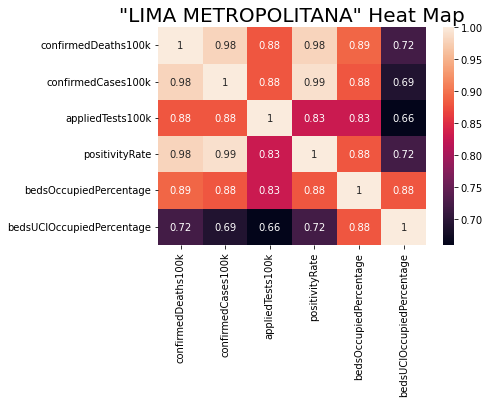

In [7]:
sns.heatmap(data=correlation_matrix,annot=True)
plt.rcParams['figure.figsize'] = (10,10)
plt.title('"LIMA METROPOLITANA" Heat Map',fontdict=font1)
plt.show()

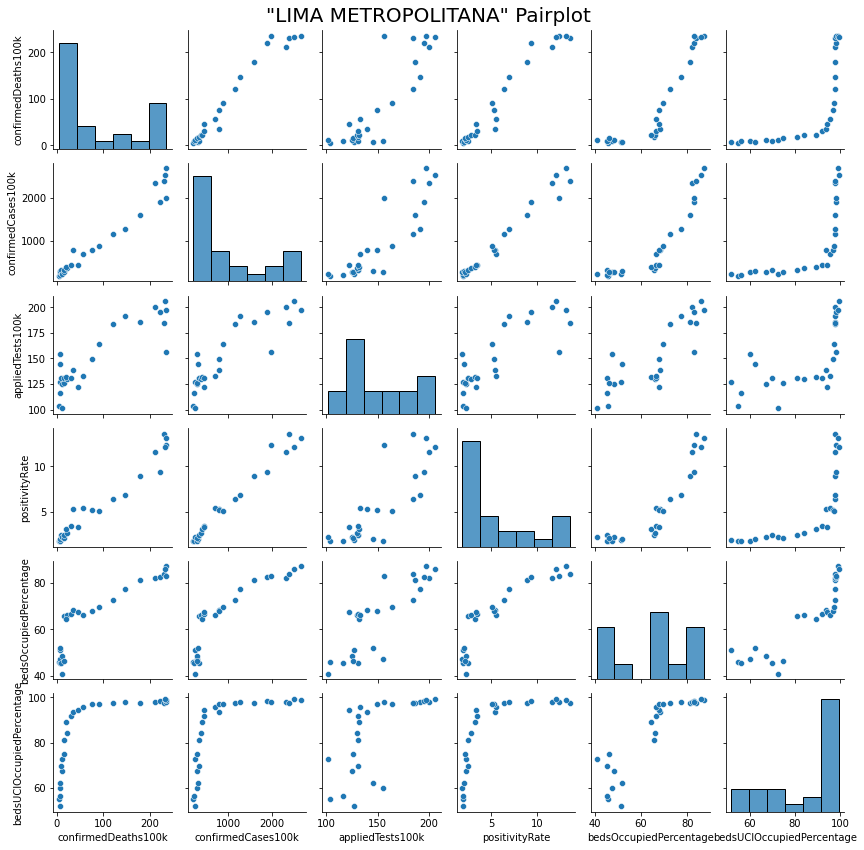

In [173]:
figure = sns.pairplot(totalIca,height=2)
figure.fig.suptitle('"LIMA METROPOLITANA" Pairplot',fontsize=20)
plt.tight_layout()

# Calculating RISK 1

In [99]:
def CasesPer100K(inputNumber):
    if inputNumber <= 4:
        return 1
    elif inputNumber <= 9:
        return 2
    elif inputNumber <= 50:
        return 3
    elif inputNumber <= 100:
        return 4
    elif inputNumber <= 199:
        return 5
    else:
        return 6

def ConfirmedDeaths100K(inputNumber):
    if inputNumber < 0.1: 
        return 2
    elif inputNumber <= 1:
        return 3
    elif inputNumber <= 2:
        return 4
    elif inputNumber <= 5:
        return 5
    else:
        return 6
    
def PositivityRate(inputNumber):
    if inputNumber <= 2.9:
        return 1
    elif inputNumber <= 4.9:
        return 2
    elif inputNumber <= 7.9:
        return 3
    elif inputNumber <= 10:
        return 4
    elif inputNumber <= 15:
        return 5
    else:
        return 6

def Tests100K(inputNumber):
    if inputNumber >= 5000:
        return 1
    elif inputNumber >= 3000:
        return 2
    elif inputNumber >= 2000:
        return 3
    elif inputNumber >= 1000:
        return 4
    elif inputNumber >= 500:
        return 5
    else:
        return 6

def BedsOccupied(inputNumber):
    if inputNumber <= 3:
        return 1
    elif inputNumber <= 7:
        return 2
    elif inputNumber <= 12:
        return 3
    elif inputNumber <= 15:
        return 4
    elif inputNumber <= 20:
        return 5
    else:
        return 6
    
def BedsUCIOccupied(inputNumber):
    if inputNumber <= 3:
        return 1
    elif inputNumber <= 7:
        return 2
    elif inputNumber <= 12:
        return 3
    elif inputNumber <= 15:
        return 4
    elif inputNumber <= 20:
        return 5
    else:
        return 6
    
def ConvertToScale(inputNumber, target):
    if target == 'confirmedCases100k':
        return CasesPer100K(inputNumber)
    elif target == 'appliedTests100k':
        return Tests100K(inputNumber)
    elif target == 'positivityRate':
        return PositivityRate(inputNumber)
    elif target == 'bedsOccupiedPercentage':
        return BedsOccupied(inputNumber)
    elif target == 'bedsUCIOccupiedPercentage':
        return BedsUCIOccupied(inputNumber)
    
    
def getIndex(city):
    endDate = 196 + getOffSetTime()
    rangeDates = list(range(endDate,0,-7))
    totalIndividual = ''
    currentDF = '' 
    for i in rangeDates:
        try:
            testDf = getProcessedTable(datetime.date.today()-datetime.timedelta(days=i))
            testDf = testDf[testDf['regions'] == city]
            del testDf['regions']

            if i == rangeDates[-1]:
                currentDF = testDf

            if i == endDate:
                totalIndividual = testDf
            else:
                totalIndividual = pd.concat([totalIndividual,testDf],ignore_index=True)
        except:
            continue

    correlation_matrix = totalIndividual.corr()
    correlation_matrix_filtered = correlation_matrix['confirmedDeaths100k']
    correlation_matrix_filtered = correlation_matrix_filtered[[1,2,3,4,5]]
    correlation_matrix_filtered = correlation_matrix_filtered/sum(correlation_matrix_filtered)
    correlation_matrix_filtered = pd.DataFrame(correlation_matrix_filtered)
    correlation_matrix_filtered.columns = [city]
    
    weights_table_city = correlation_matrix_filtered
    weights_table_city = weights_table_city.transpose()
    
    totalRisk = 0
    for rate in ['confirmedCases100k','appliedTests100k','appliedTests100k','positivityRate','bedsOccupiedPercentage','bedsUCIOccupiedPercentage']:
        dataRate = float(currentDF[rate])
        riskNoWeight = ConvertToScale(dataRate,rate)
        factorWeight = float(weights_table_city[rate])
        riskWeighted = factorWeight * riskNoWeight
        totalRisk = totalRisk + riskWeighted
    
    return totalRisk